## Importing the .csv file of PCG signal

#### Here my file name is PCG_P01_GW_36_10sec.csv, is a 10-sec data where I am using DB4 Wavelet with first level of decomposition 

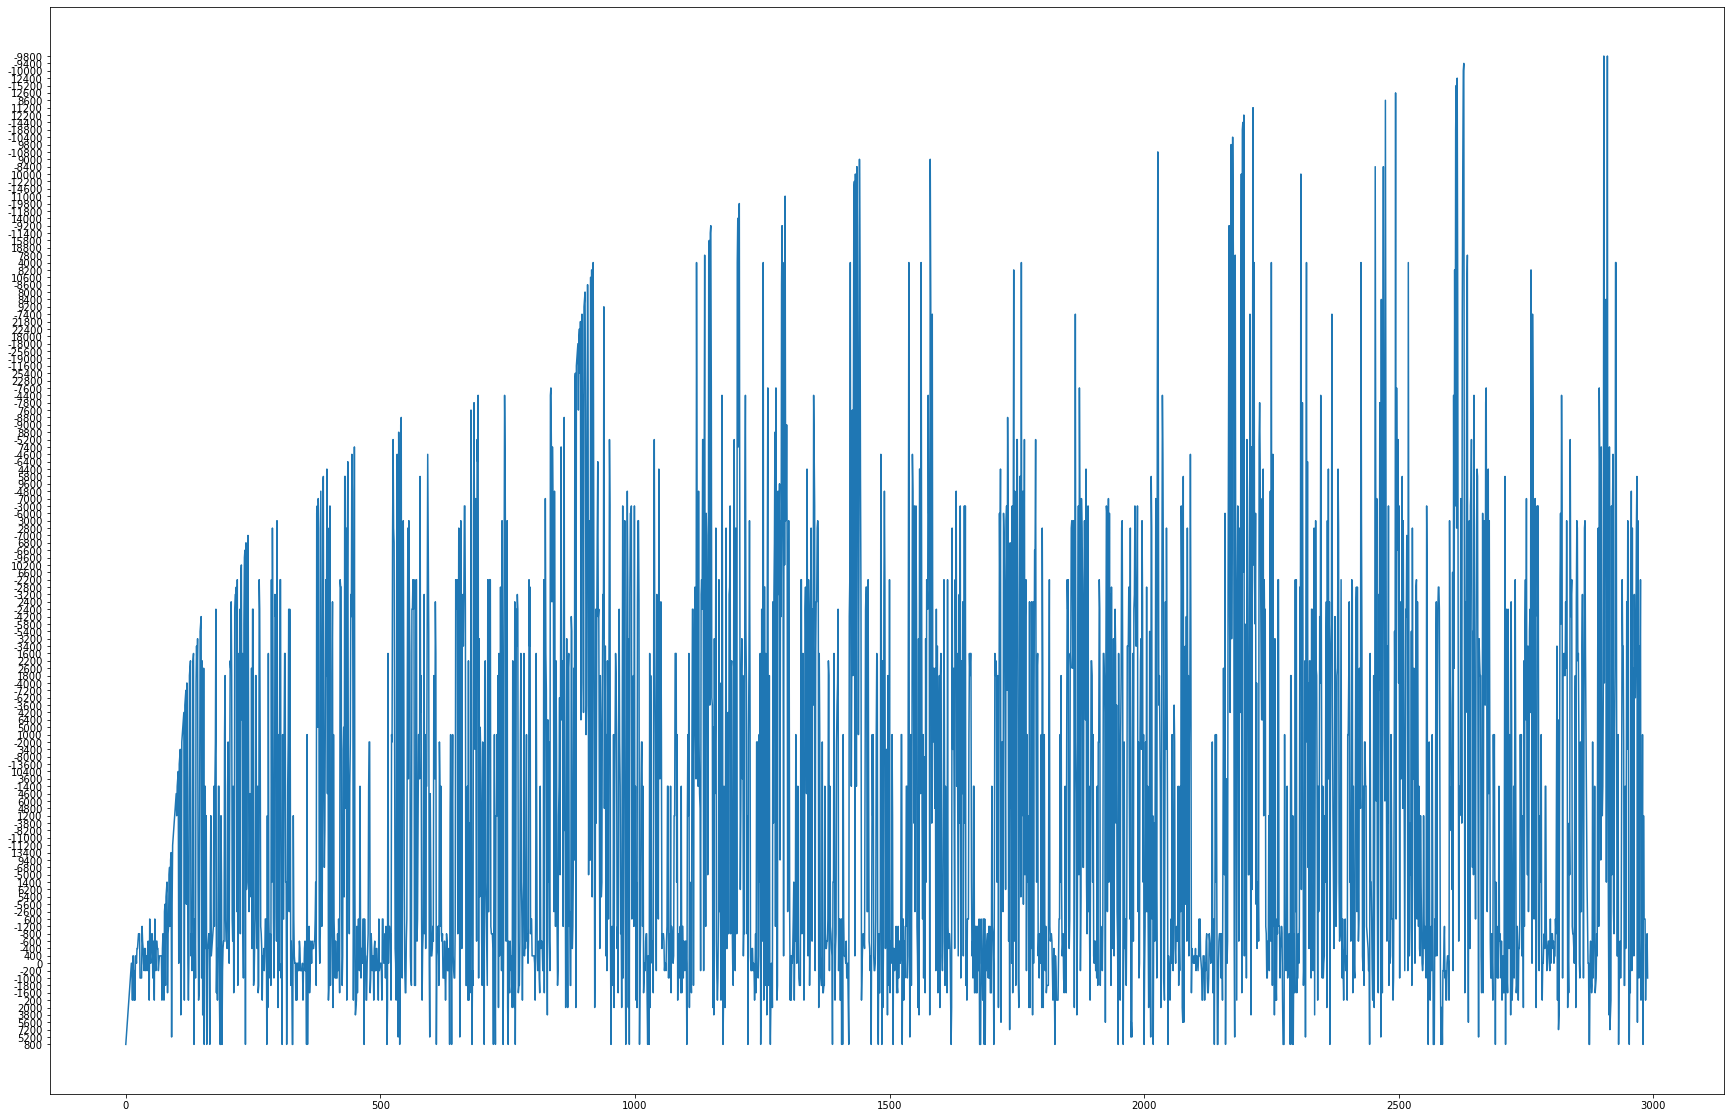

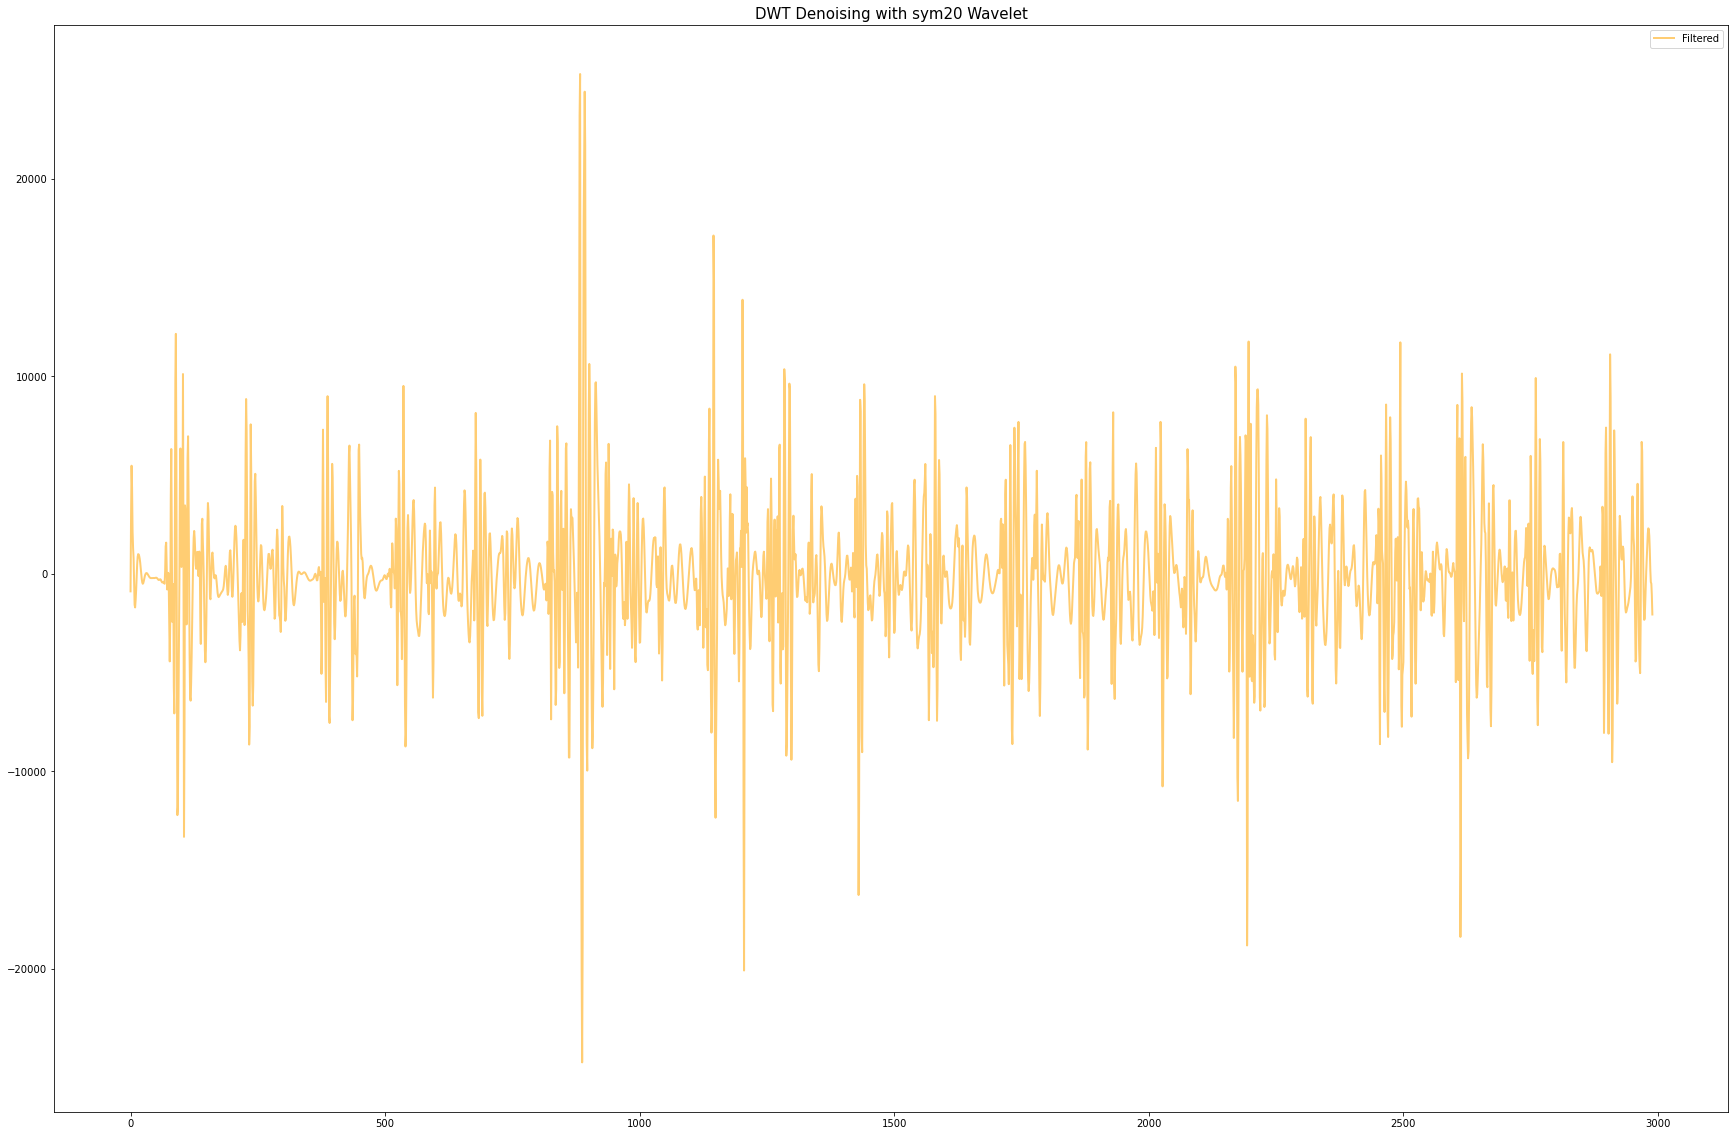

In [7]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P01_GW_36_10sec.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][10:3000].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered = wavelet_denoising(signal, wavelet=wav, level=1)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered = wavelet_denoising(signal, wavelet=wav, level=1)  
signal = df['PCG'][10:3000].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

## Calculating the spectrum using scipy.fftpack

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft

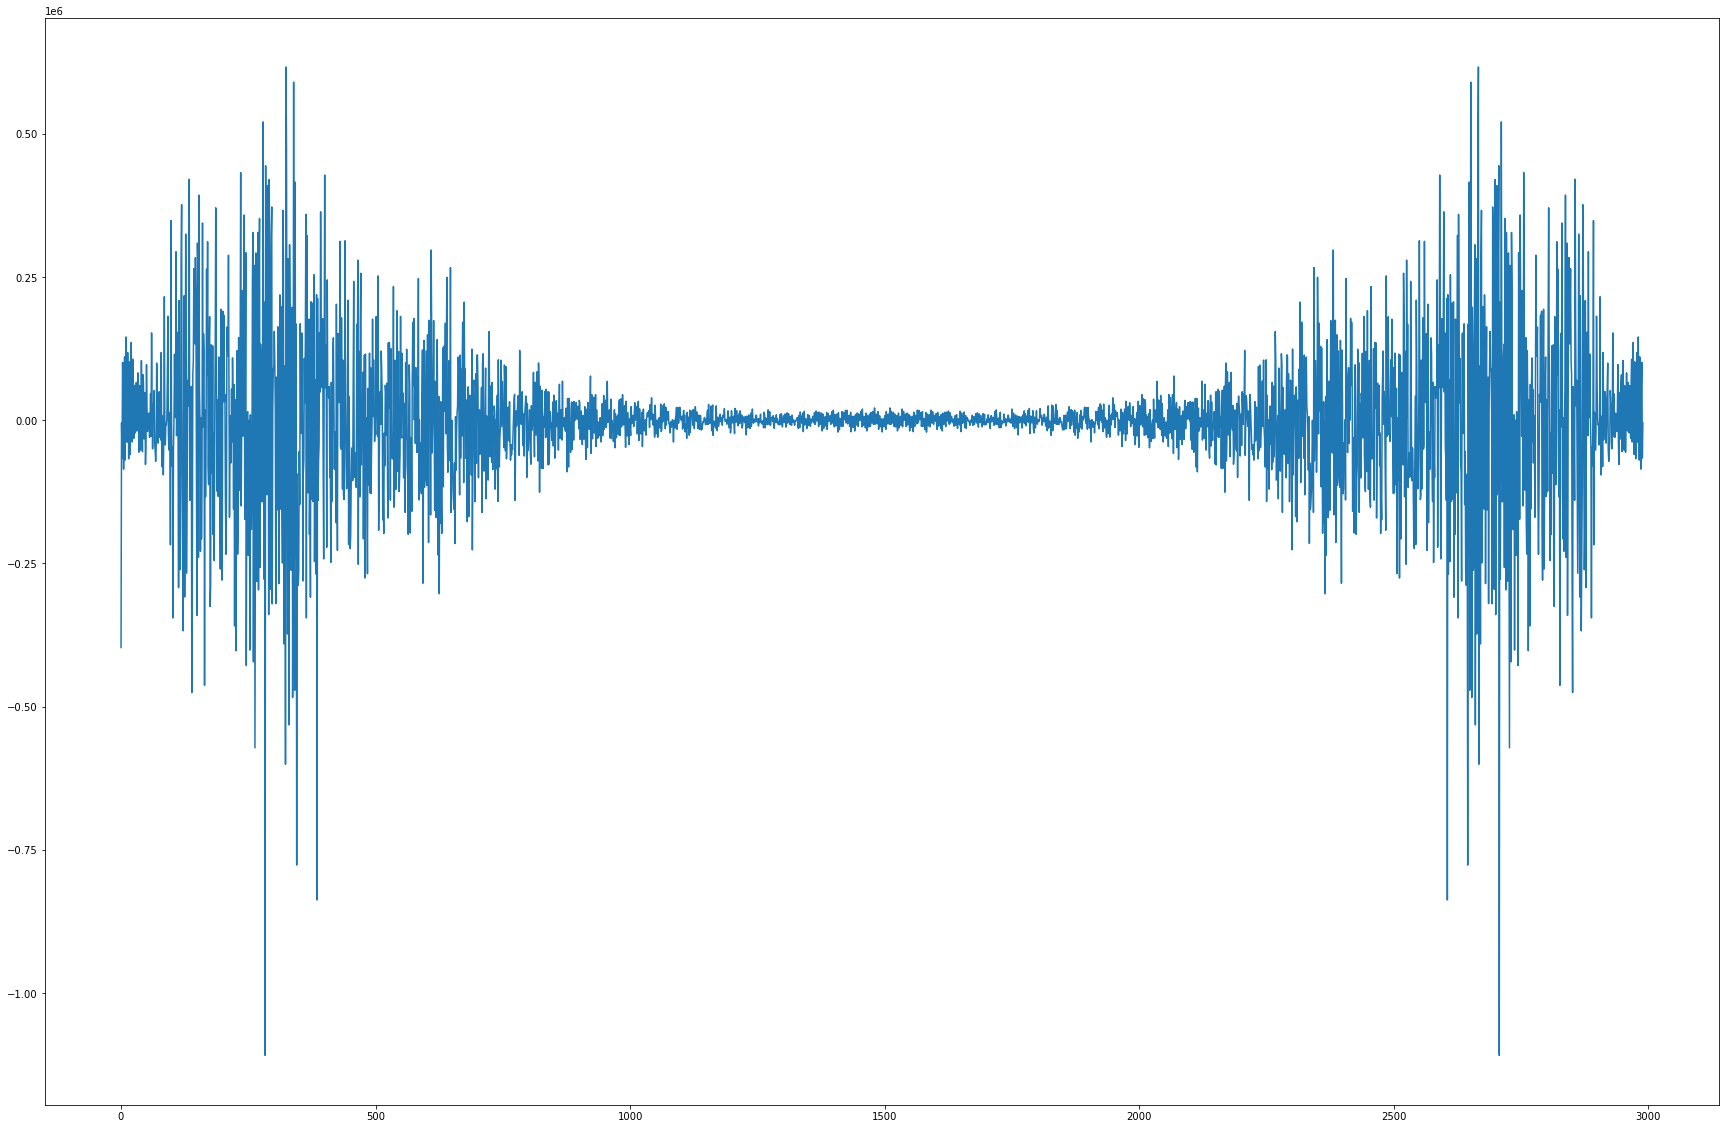

In [9]:
spectrum = fft(filtered)
plt.figure(figsize=(30, 20))
plt.plot(spectrum)
plt.show()

## Calculating the magnitude spectrum for same signal

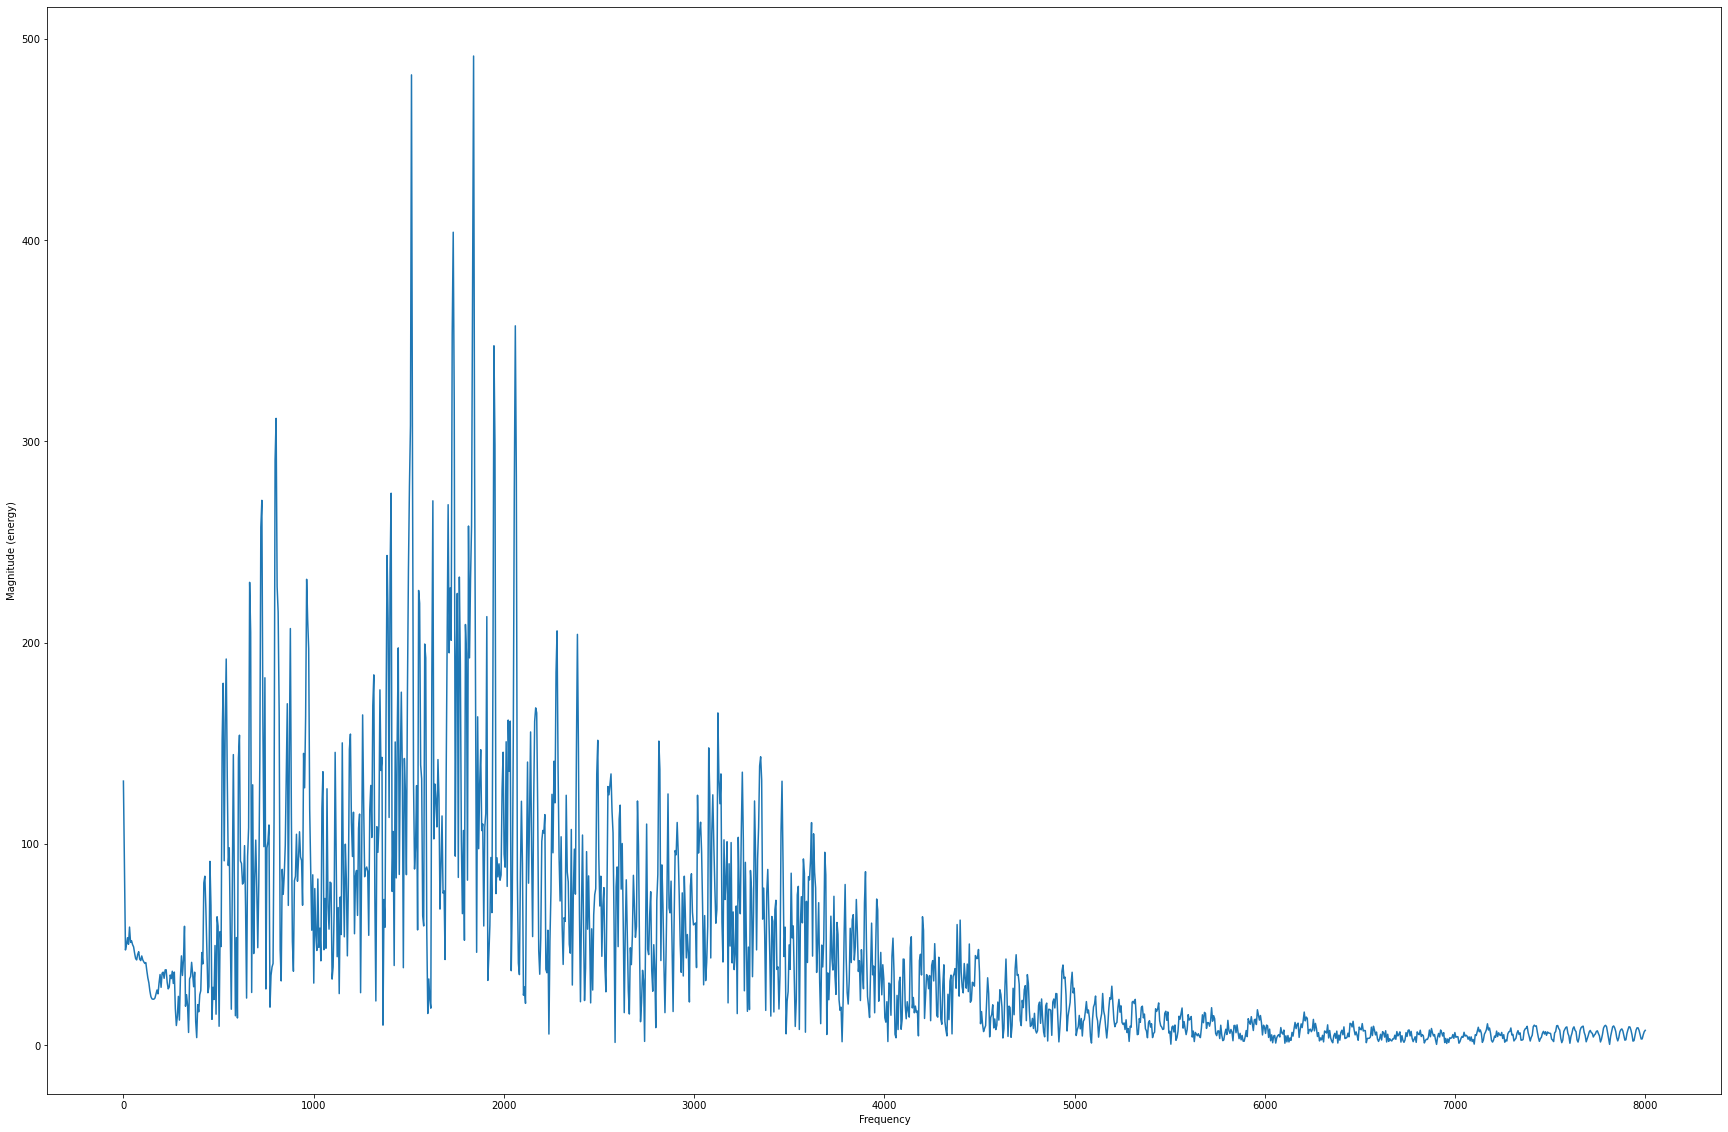

In [10]:
plt.figure(figsize=(30, 20))
plt.magnitude_spectrum(filtered,Fs=16000) 
plt.show()

## calculating the signal to noise ratio

In [11]:
import numpy as np   
def signaltonoise(filtered, axis=0, ddof=0):
    filtered = np.asanyarray(filtered)
    me = filtered.mean(axis)
    sd = filtered.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, me/sd)
print(signaltonoise(filtered,axis=0,ddof=0))

-0.03919991332376974


#### Here we got negative SNR, therefore, it means the signal power is low compared to the noise

# B) Next, we are going to consider the same signal but with different levels of decomposition

#### Here my file name is PCG_P01_GW_36_10sec.csv, is a 10-sec data where I am using DB4 Wavelet with second level of decomposition

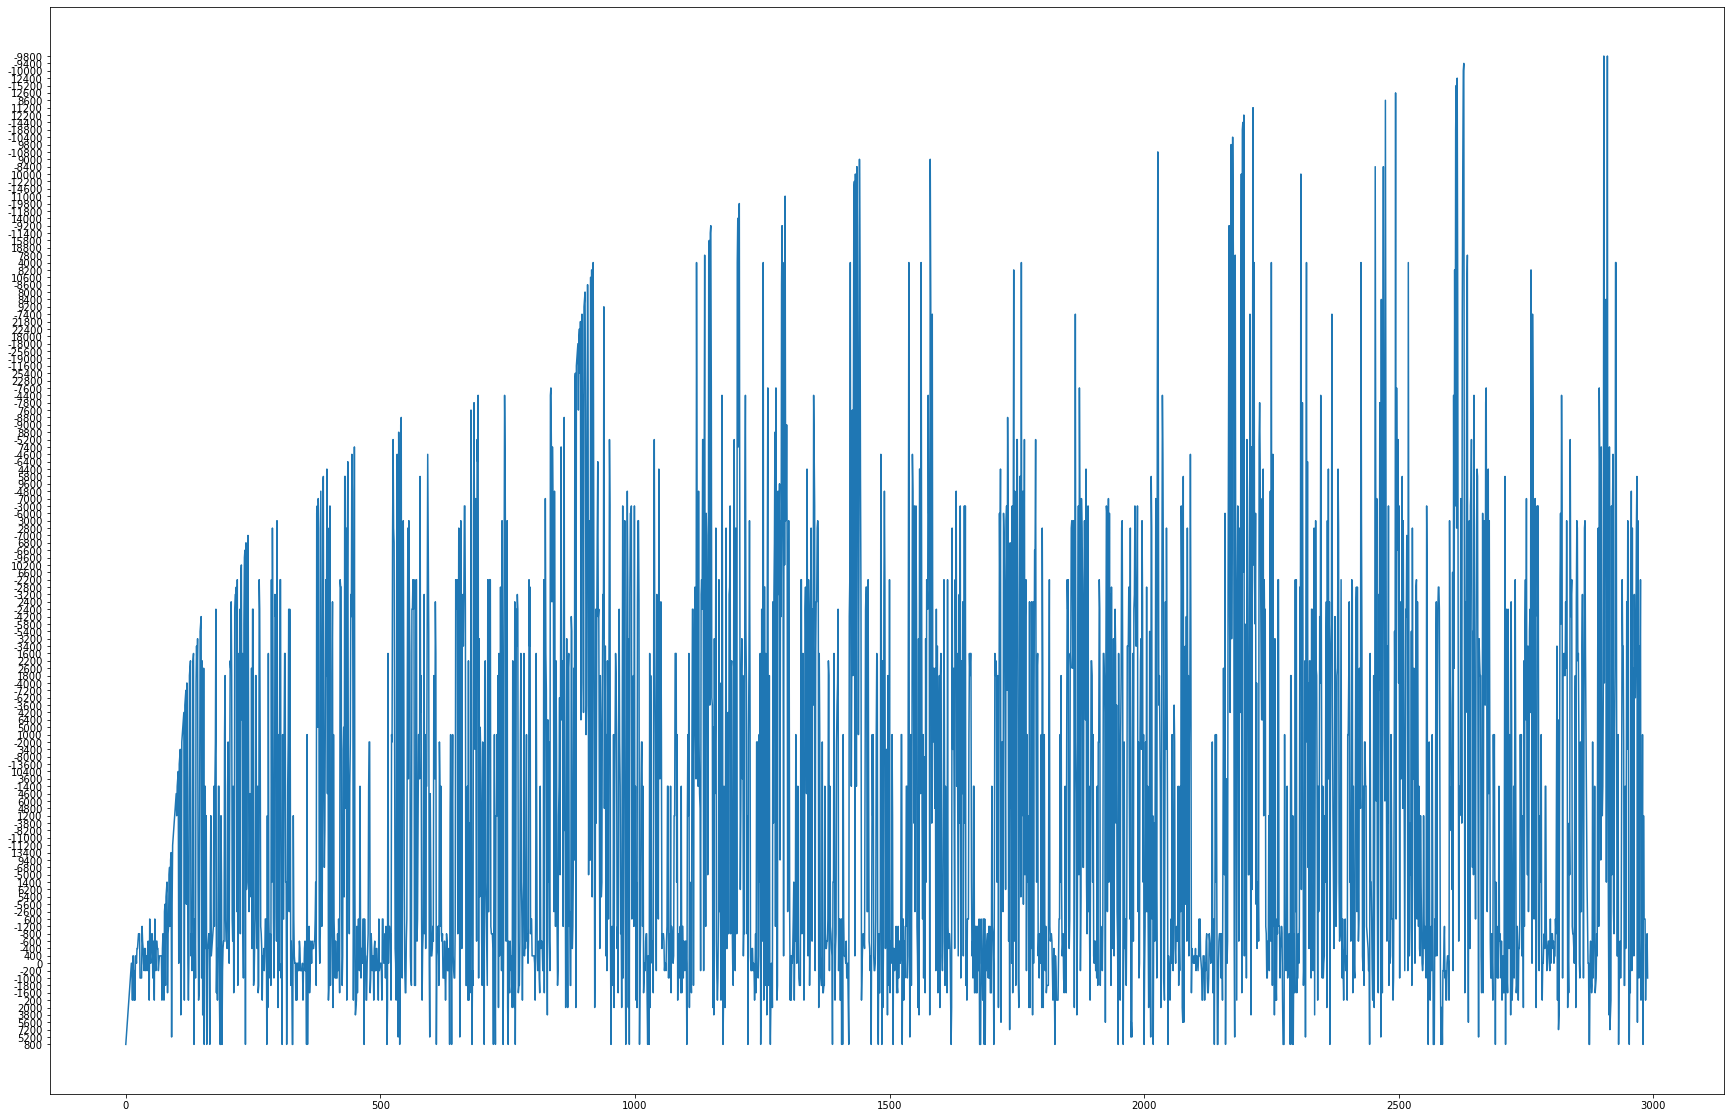

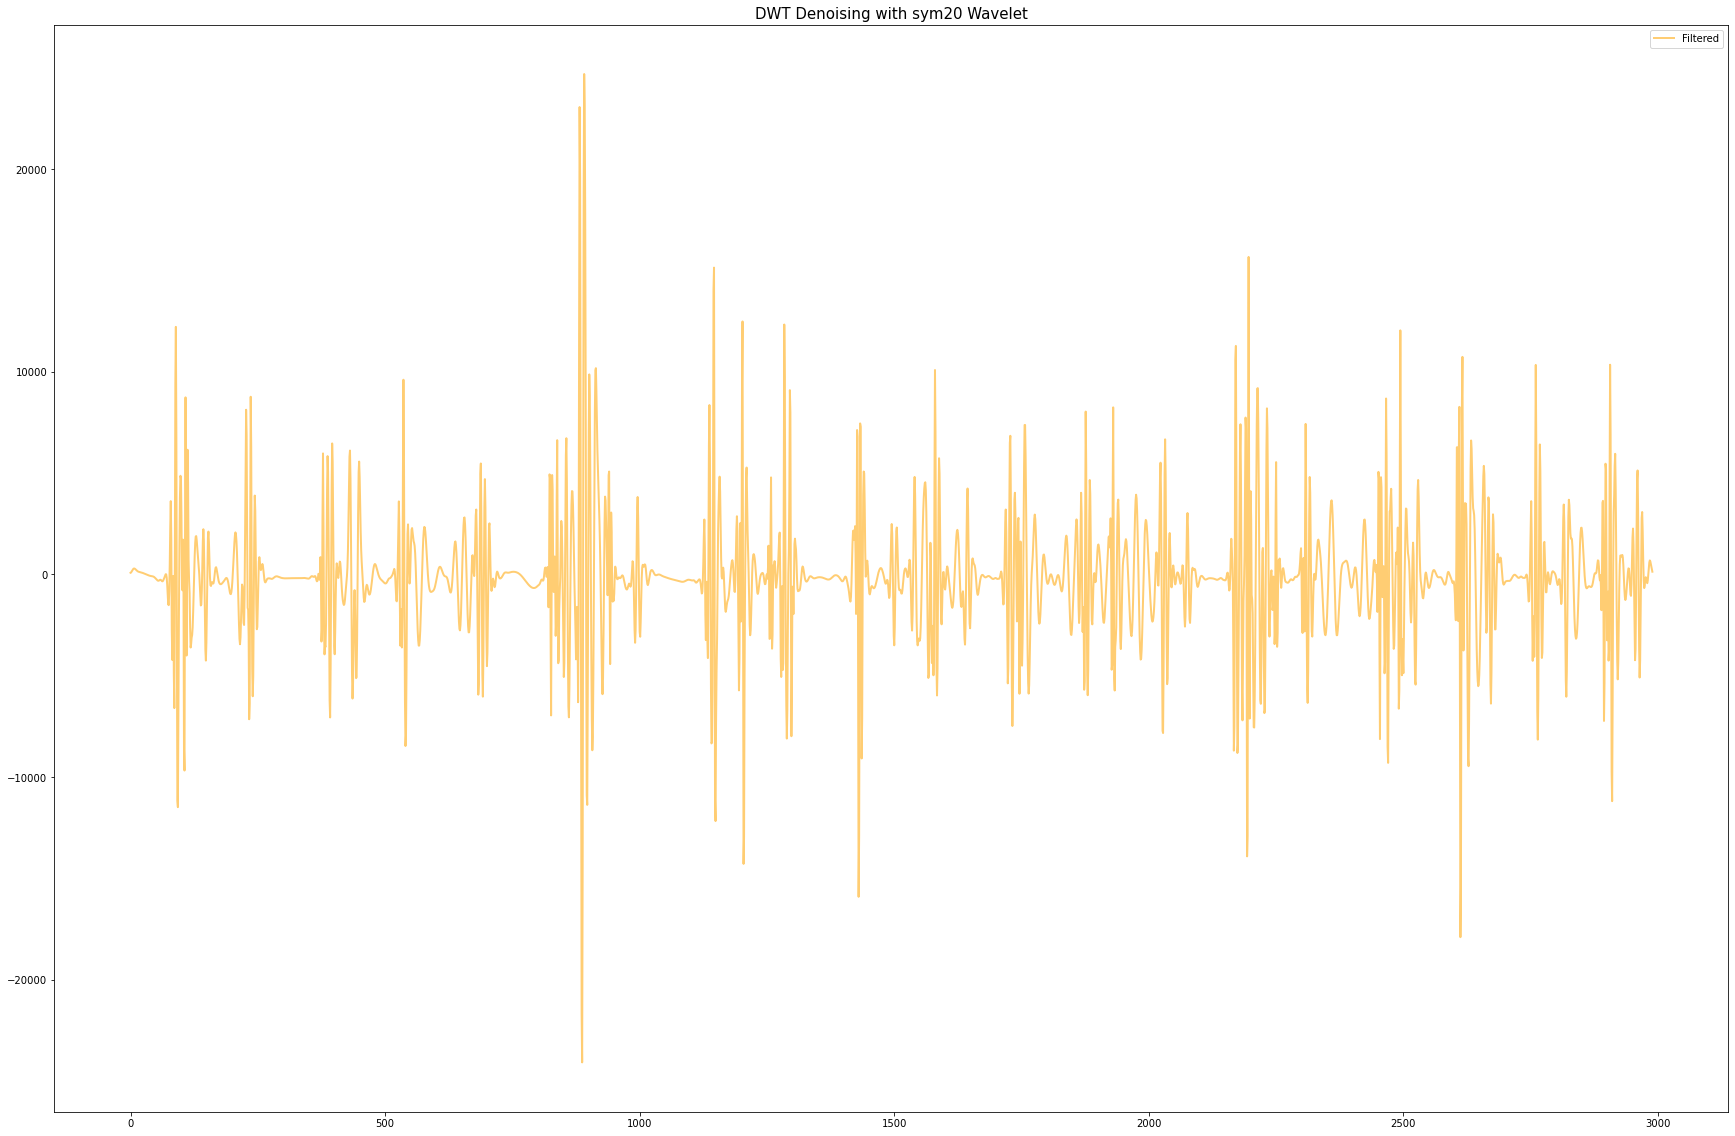

In [29]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P01_GW_36_10sec.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][10:3000].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=2):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/1.1830127) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered2 = wavelet_denoising(signal, wavelet=wav, level=2)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered2 = wavelet_denoising(signal, wavelet=wav, level=2)  
signal = df['PCG'][10:3000].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered2, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

#### As we can see that the above input signal has been denoised to a better extent than in the first case

## Calculating spectrum

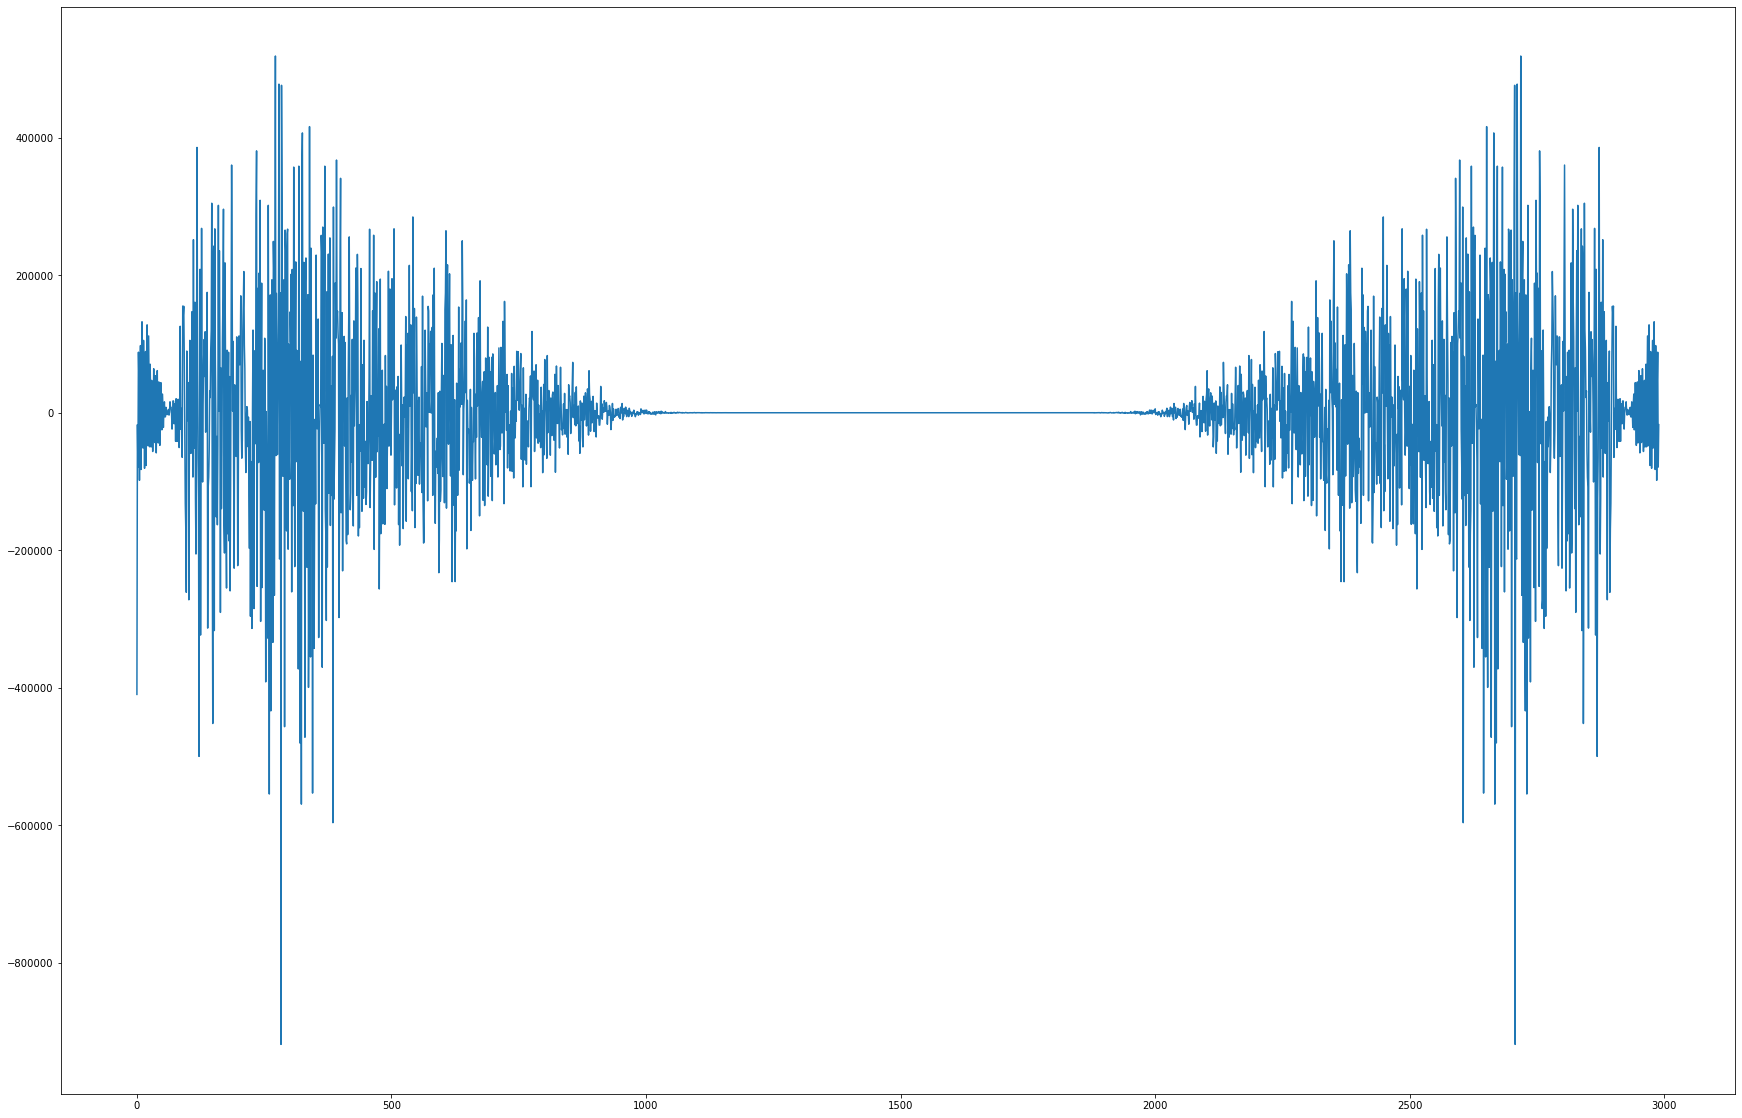

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft
spectrum = fft(filtered2)
plt.figure(figsize=(30, 20))
plt.plot(spectrum)
plt.show()


### Calculating magntiude spectrum

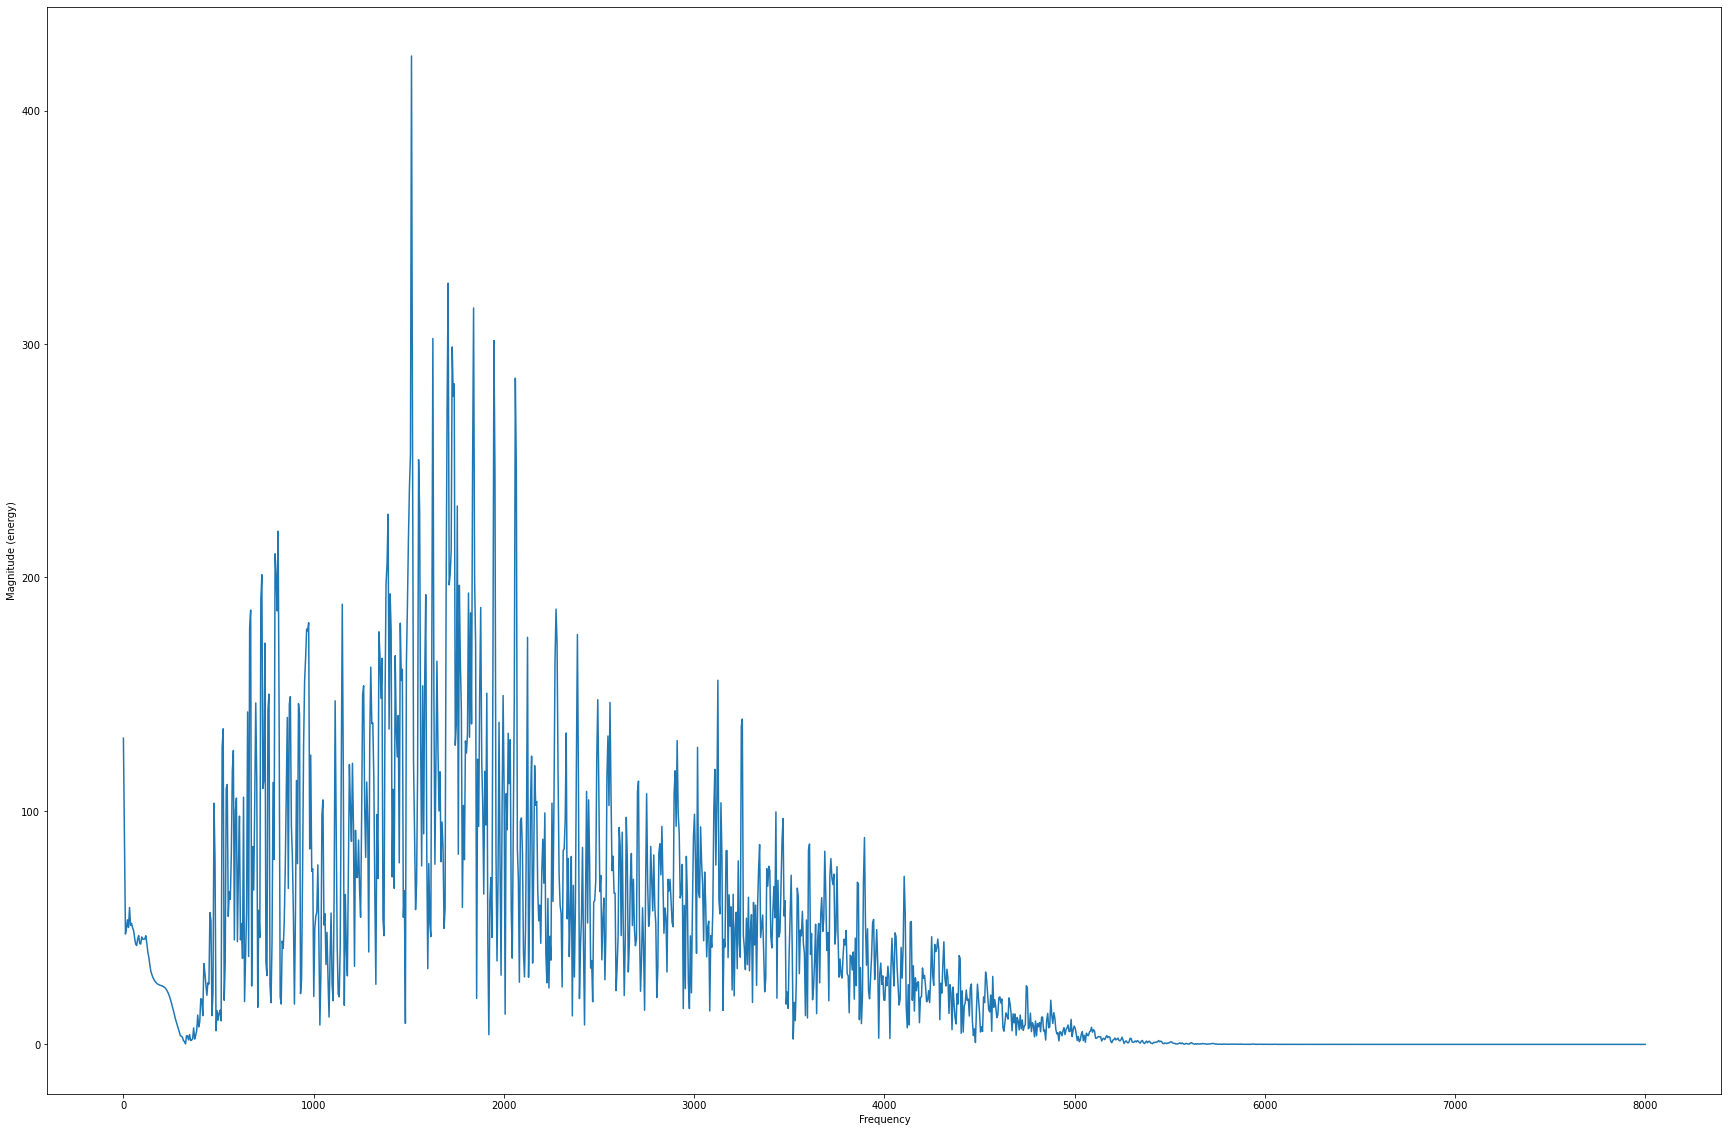

In [31]:
plt.figure(figsize=(30, 20))
plt.magnitude_spectrum(filtered2,Fs=16000) 
plt.show()

## Calculating SNR

In [32]:
import numpy as np   
def signaltonoise(filtered2, axis=0, ddof=0):
    filtered2 = np.asanyarray(filtered2)
    me = filtered2.mean(axis)
    sd = filtered2.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, me/sd)
print(signaltonoise(filtered2,axis=0,ddof=0))

-0.045960364304610285


# C) Same signal with 3rd level of decomsition

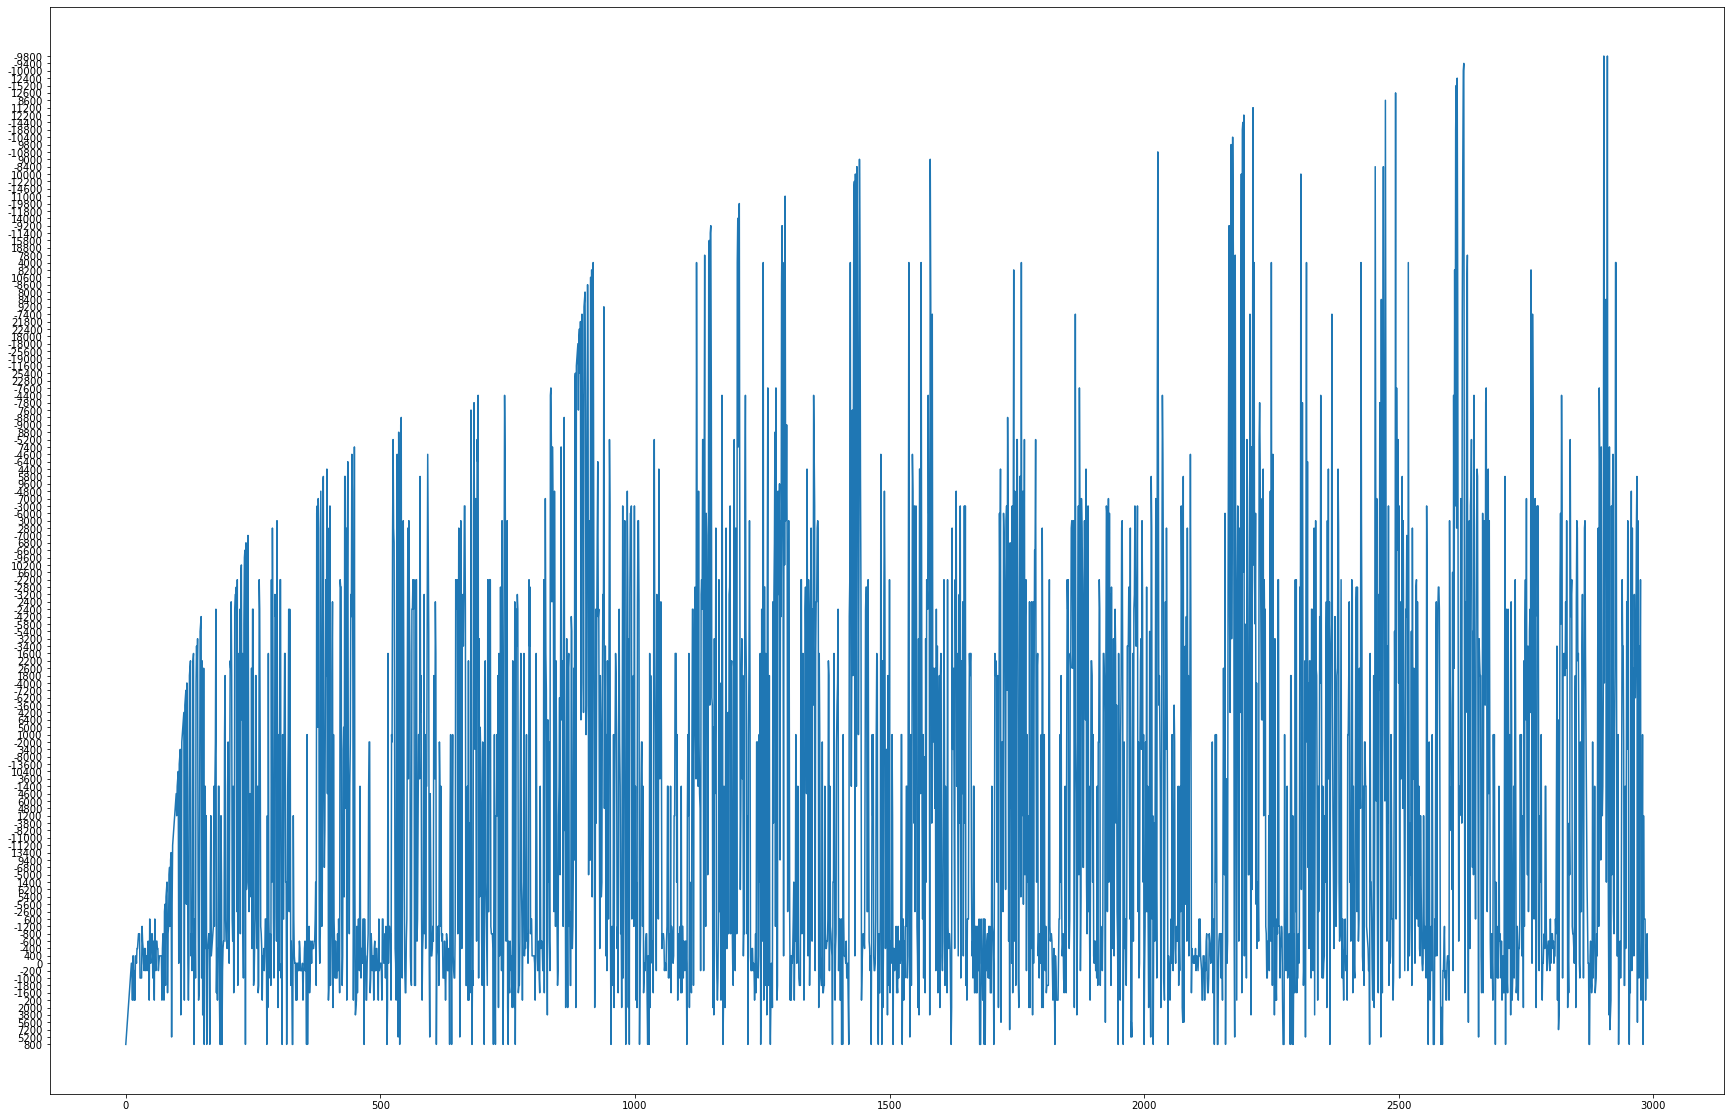

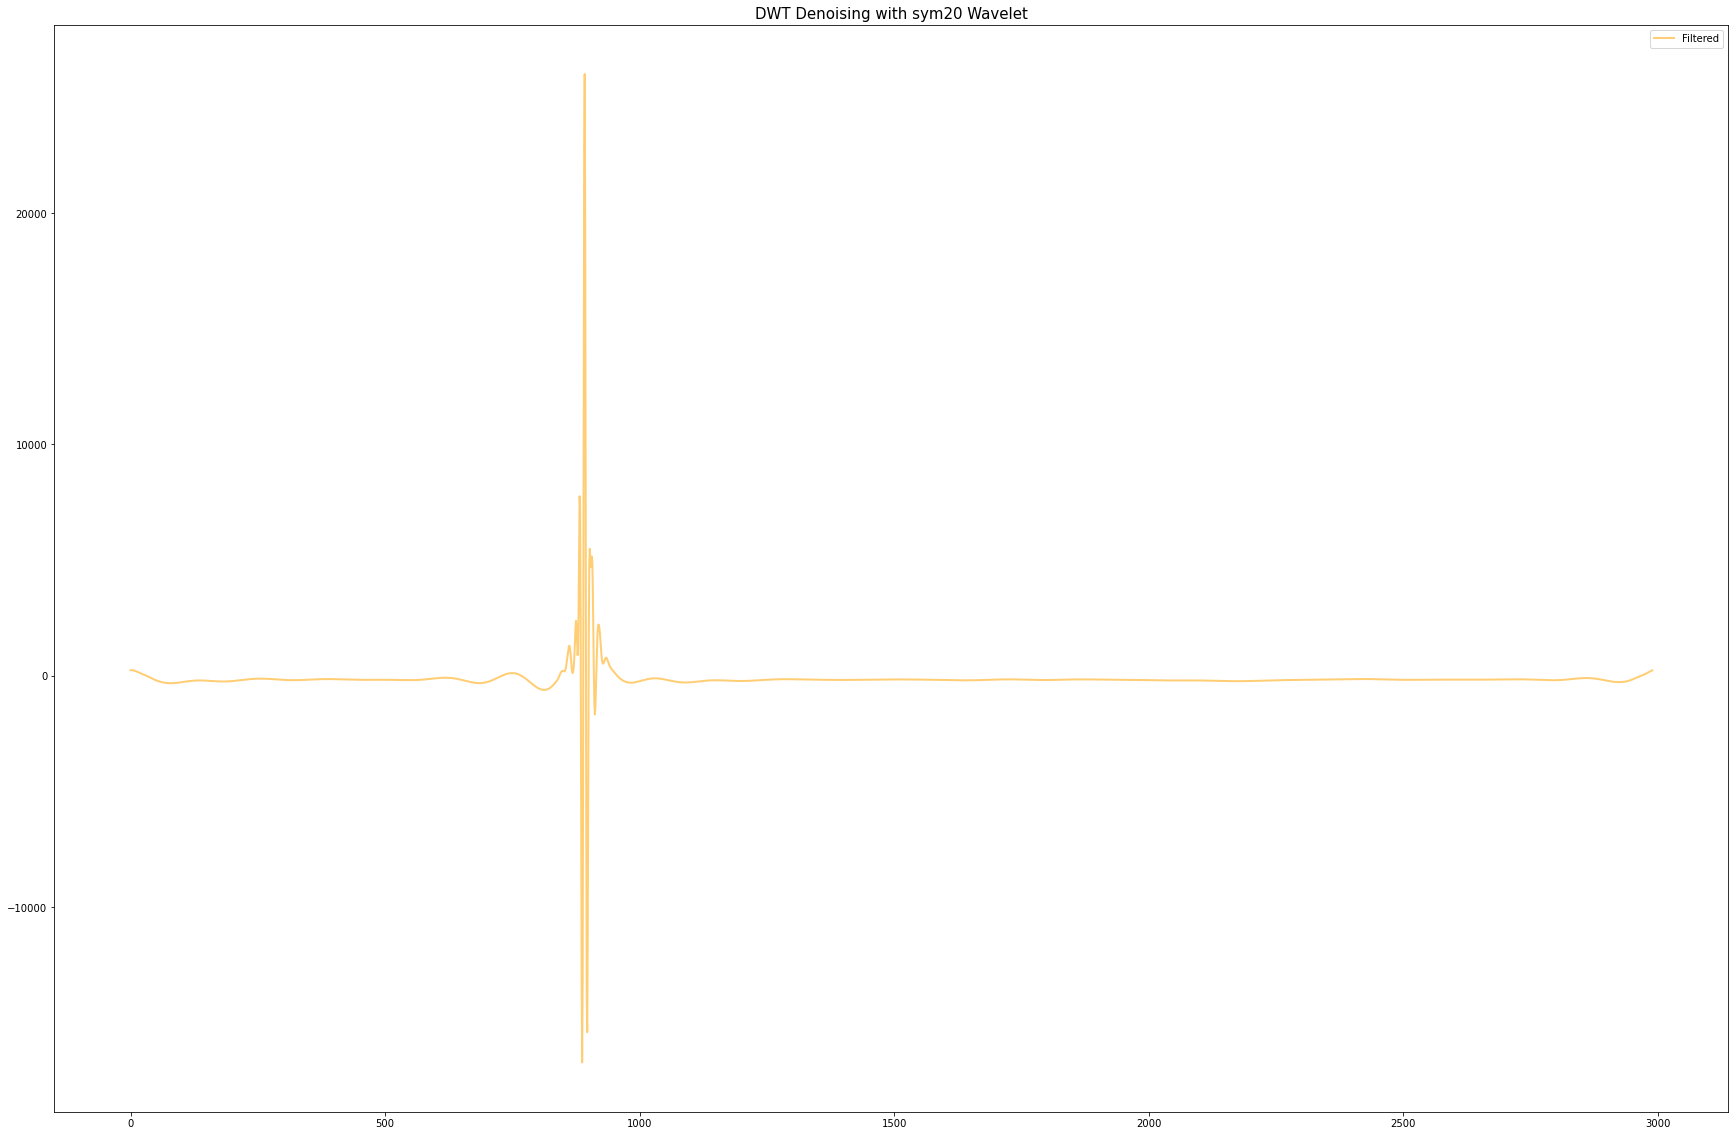

In [34]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P01_GW_36_10sec.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][10:3000].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.3169873 ) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered3 = wavelet_denoising(signal, wavelet=wav, level=3)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered3 = wavelet_denoising(signal, wavelet=wav, level=3)  
signal = df['PCG'][10:3000].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered3, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

##  Calculating spectrum

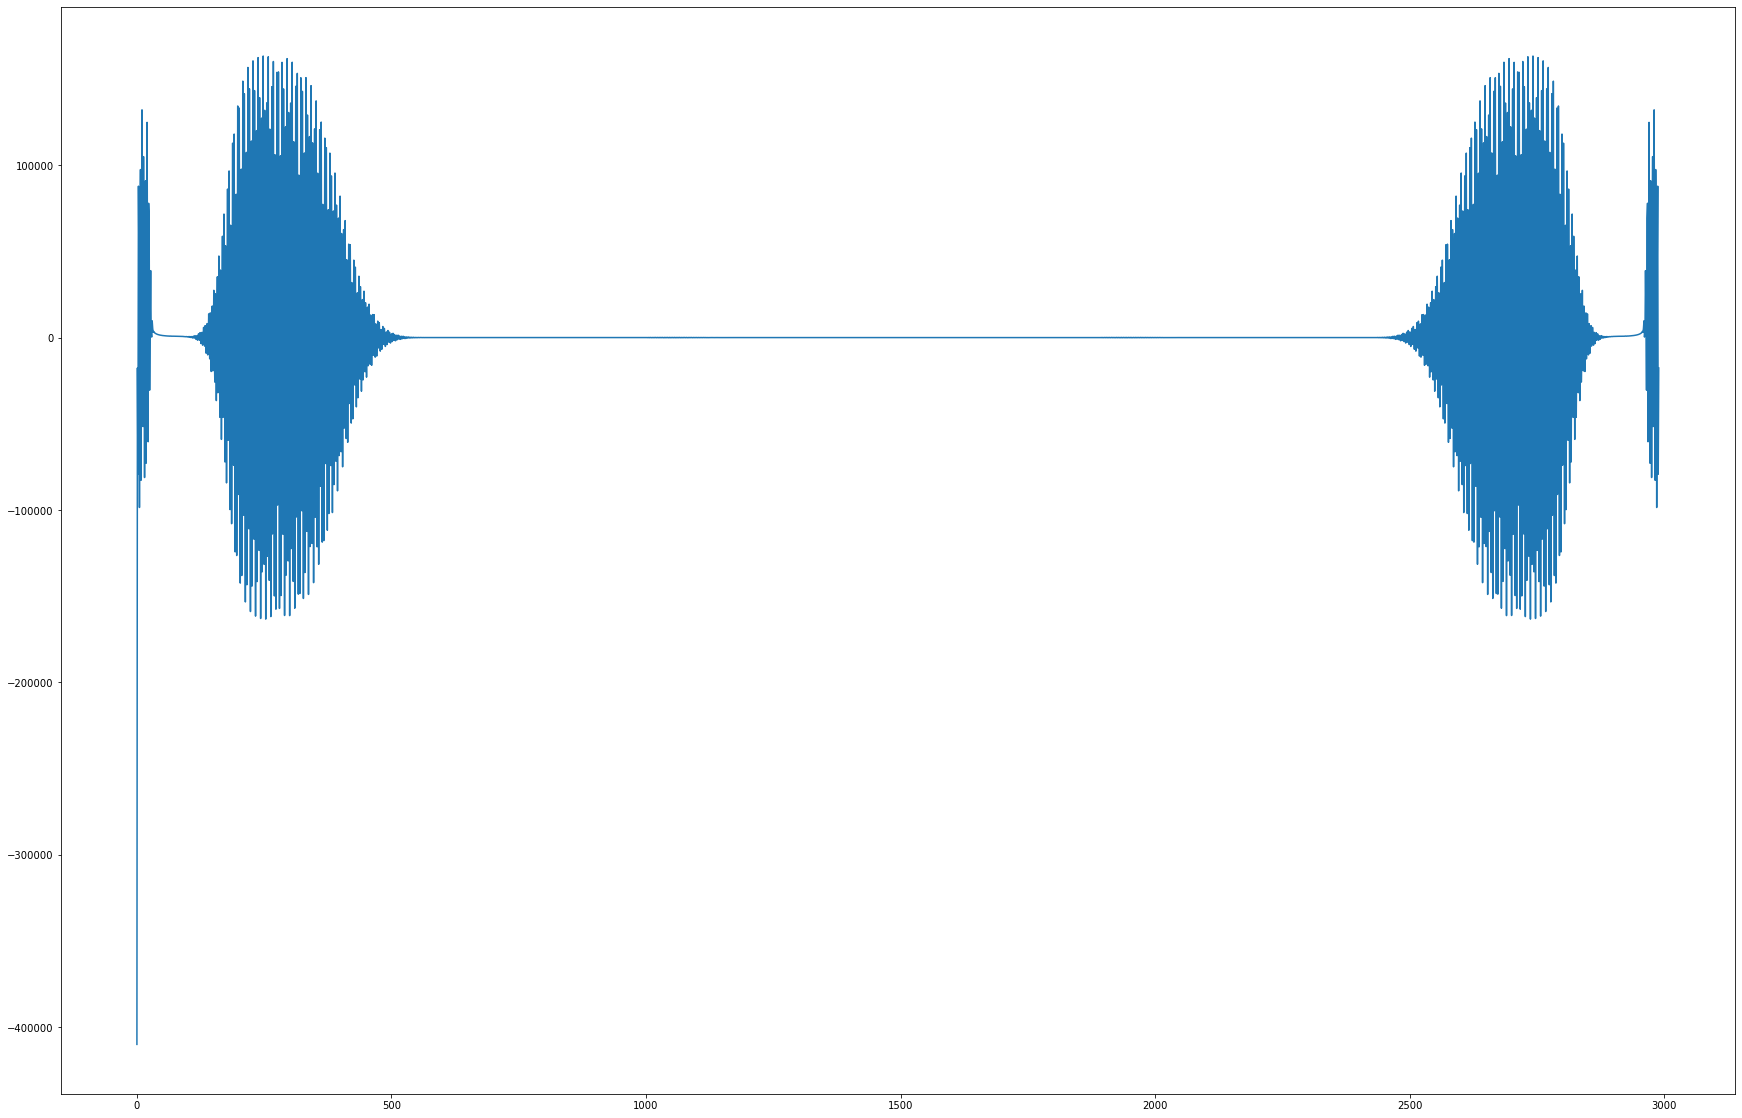

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft
spectrum = fft(filtered3)
plt.figure(figsize=(30, 20))
plt.plot(spectrum)
plt.show()


## Calculate Magnitude spectrum

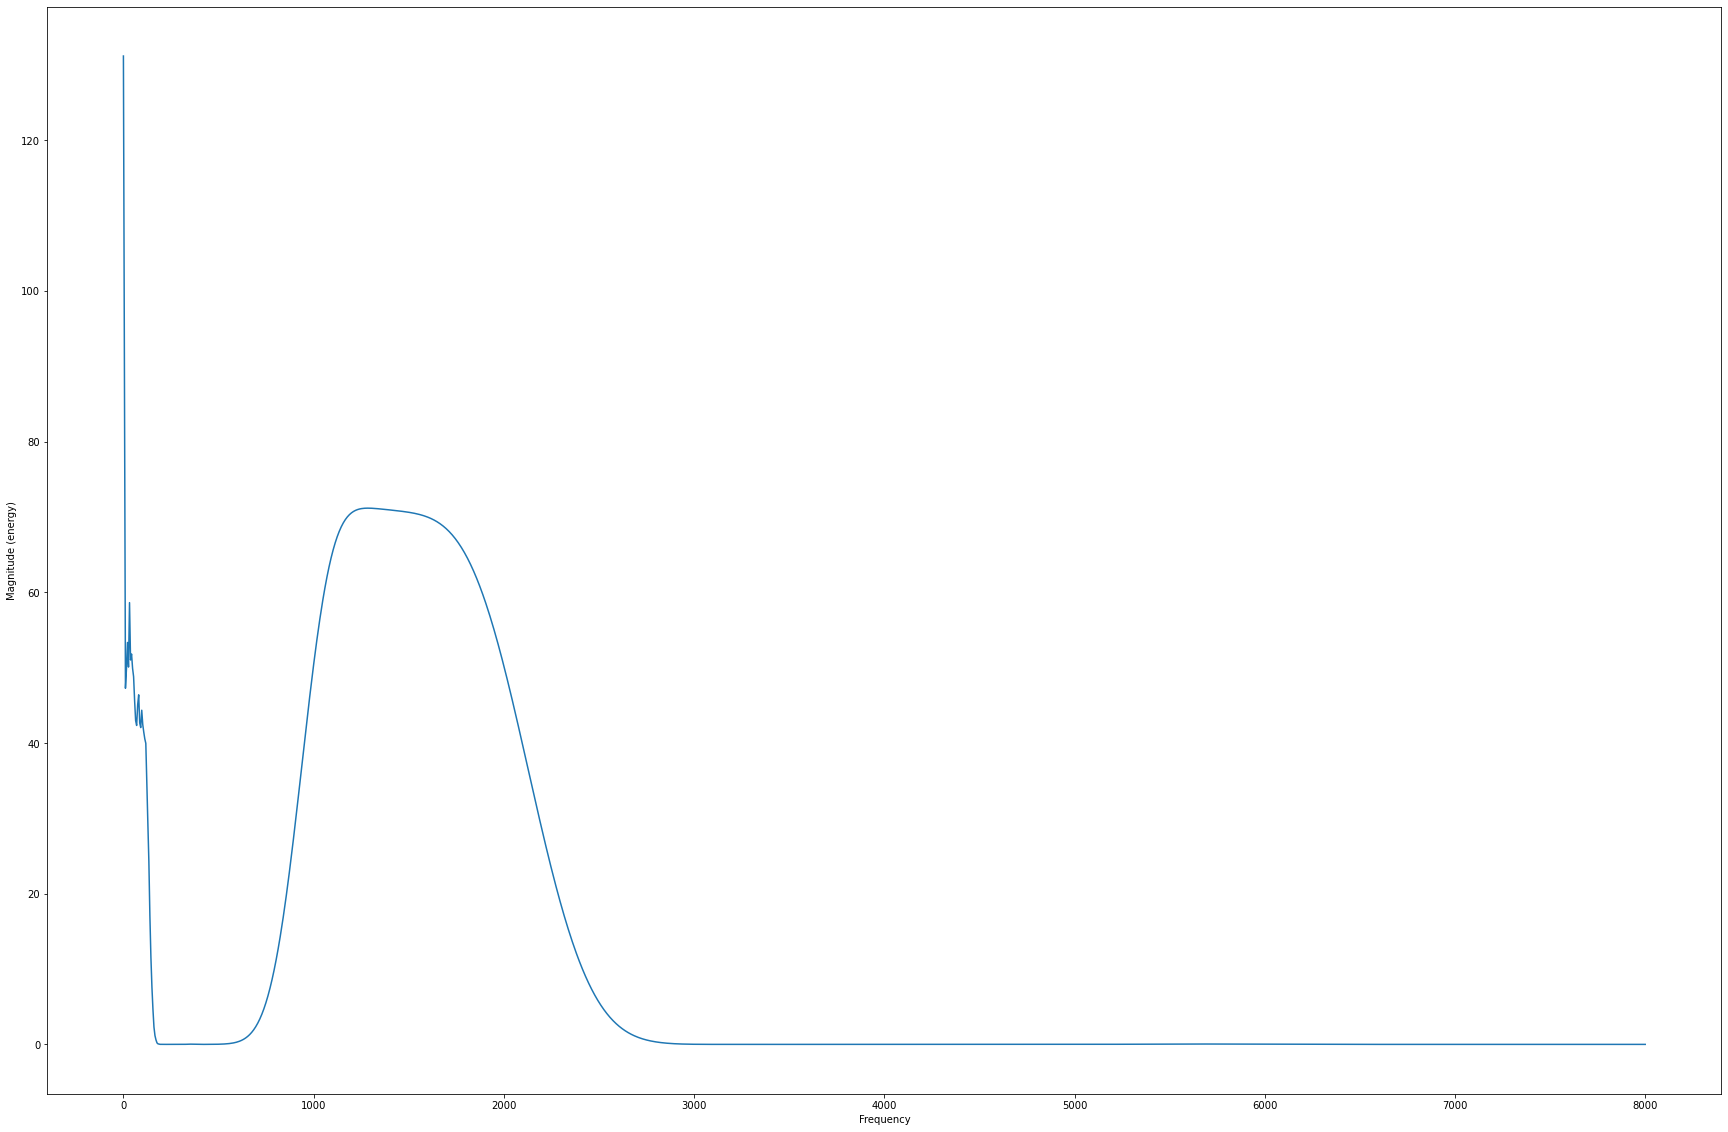

In [36]:
plt.figure(figsize=(30, 20))
plt.magnitude_spectrum(filtered3,Fs=16000) 
plt.show()

## Calculte SNR

In [37]:
import numpy as np   
def signaltonoise(filtered3, axis=0, ddof=0):
    filtered3 = np.asanyarray(filtered3)
    me = filtered3.mean(axis)
    sd = filtered3.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, me/sd)
print(signaltonoise(filtered3,axis=0,ddof=0))

-0.12625280763753627


## Playing .csv file into .wav file

In [42]:
import simpleaudio as sa

filename = 'E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\Edited_PCG_P02_GW_31_10sec.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()
